# Visualização de Dados
## Assignment 2

Base de dados utilizada: https://www.kaggle.com/datasets/sakhawatalilarik/adidas-us-sales-data?resource=download

## Limpeza de dados

### Importando as bibliotecas

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importando e limpando os dados

In [2]:
# Import data
df = pd.read_csv('..//Dados//Adidas US Sales Datasets.CSV', sep=";", encoding='utf-8', decimal=',', thousands='.')

# Convert data (str to float)
columns = ['Price per Unit', 'Total Sales', 'Operating Profit', 'Operating Margin']
for column in columns:
    # Remove '$', '%' and '.' from data
    df[column] = df[column].str.replace('$', '', regex=False).str.replace('%', '', regex=False).str.replace('.', '', regex=False)
    # Change data type
    df[column] = df[column].astype(float)

# Convert 'Invoice Date' to datetime
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'], format='%d/%m/%Y')

# Convert 'Retailer ID' to str
df['Retailer ID'] = df['Retailer ID'].astype(str)

In [3]:
# Top 5 rows
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,50.0,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,30.0,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,35.0,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,35.0,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,30.0,In-store


In [4]:
# Columns
df.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method'],
      dtype='object')

### Exportando os dados para um arquivo csv

In [5]:
# Export data
df.to_csv('..//Dados//adidas.csv', sep=";", encoding='utf-8', index=False, decimal=',')

### Verificações de sanidade

#### Dados nulos

In [6]:
# Count NaN values
for column in df.columns:
    print(column, df[column].isna().sum())

Retailer 0
Retailer ID 0
Invoice Date 0
Region 0
State 0
City 0
Product 0
Price per Unit 0
Units Sold 0
Total Sales 0
Operating Profit 0
Operating Margin 0
Sales Method 0


#### Verificação de valores inconsistentes

In [7]:
df.describe()

,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,45.216625,256.930037,93273.437500,34425.282131,42.299129
std,14.705397,214.252030,141916.016727,54193.124141,9.719742
min,7.000000,0.000000,0.000000,0.000000,10.000000
25%,35.000000,106.000000,4254.500000,1922.000000,35.000000
50%,45.000000,176.000000,9576.000000,4371.500000,41.000000
75%,55.000000,350.000000,150000.000000,52063.000000,49.000000
max,110.000000,1275.000000,825000.000000,390000.000000,80.000000


In [8]:
# Get numeric columns
df_num = df.select_dtypes(include=['float64', 'int64'])
df_num

,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
0,50.0,1200,600000.0,300000.0,50.0
1,50.0,1000,500000.0,150000.0,30.0
2,40.0,1000,400000.0,140000.0,35.0
3,45.0,850,382500.0,133875.0,35.0
4,60.0,900,540000.0,162000.0,30.0
...,...,...,...,...,...
9643,50.0,64,3200.0,896.0,28.0
9644,41.0,105,4305.0,1378.0,32.0
9645,41.0,184,7544.0,2791.0,37.0
9646,42.0,70,2940.0,1235.0,42.0


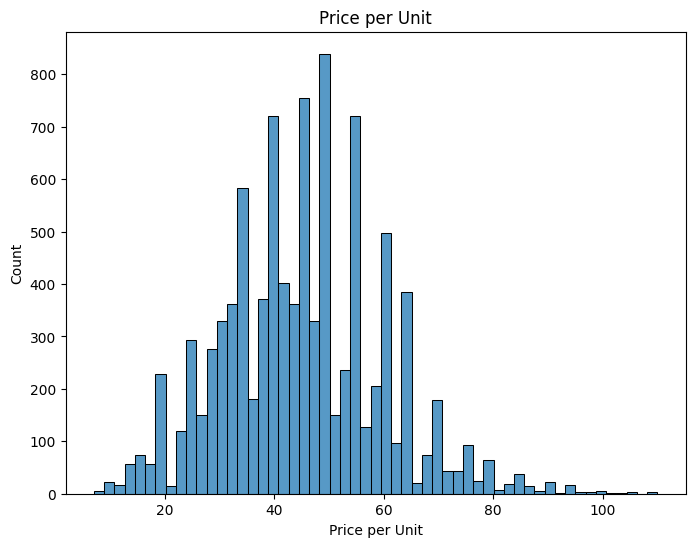

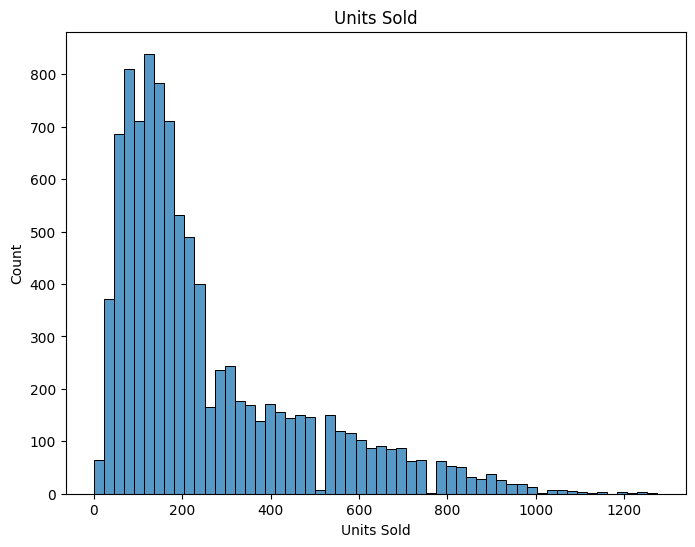

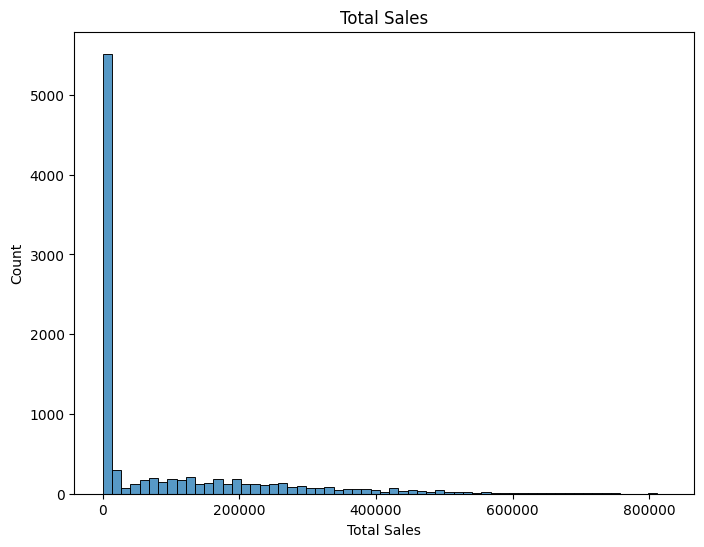

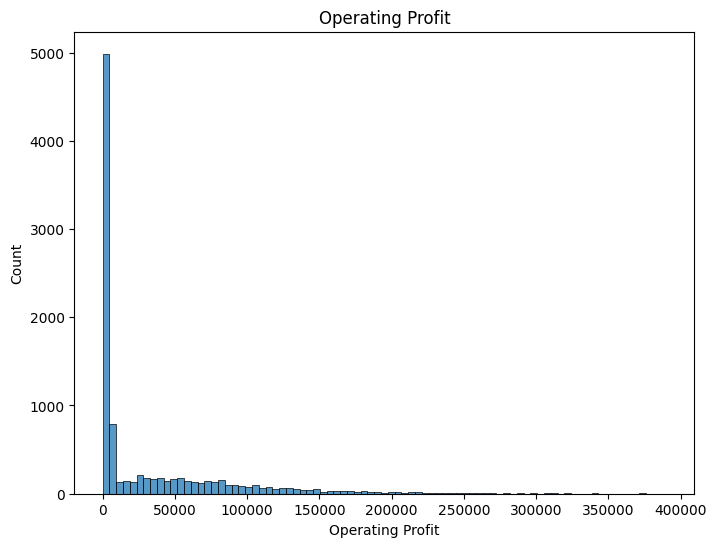

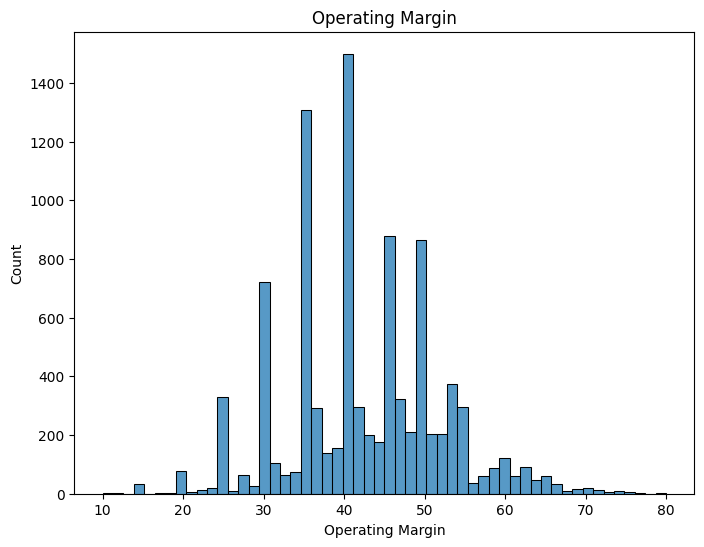

In [9]:
# Plot histograms of numeric columns (seaborn)
for column in df_num.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_num[column])
    plt.title(column)
    plt.show()

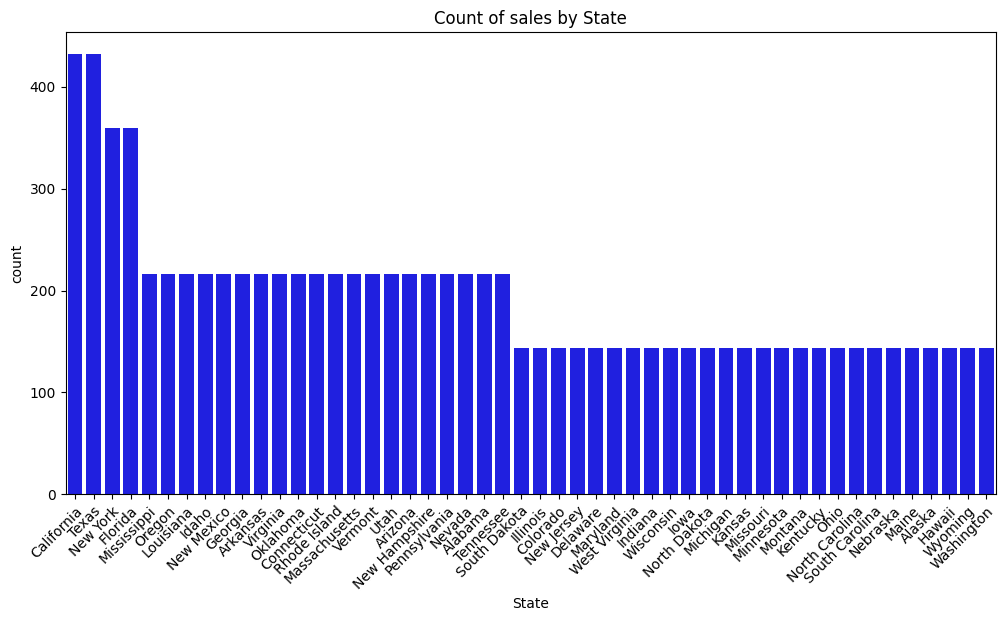

In [10]:
# Show count of sales of 'State' (seaborn)
plot = sns.countplot(x='State', data=df, color='blue', order=df['State'].value_counts().index)
plt.title('Count of sales by State')
plt.setp(plot.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
# Change figure size
fig = plot.get_figure()
fig.set_size_inches(12, 6)
# Show plot
plt.show()

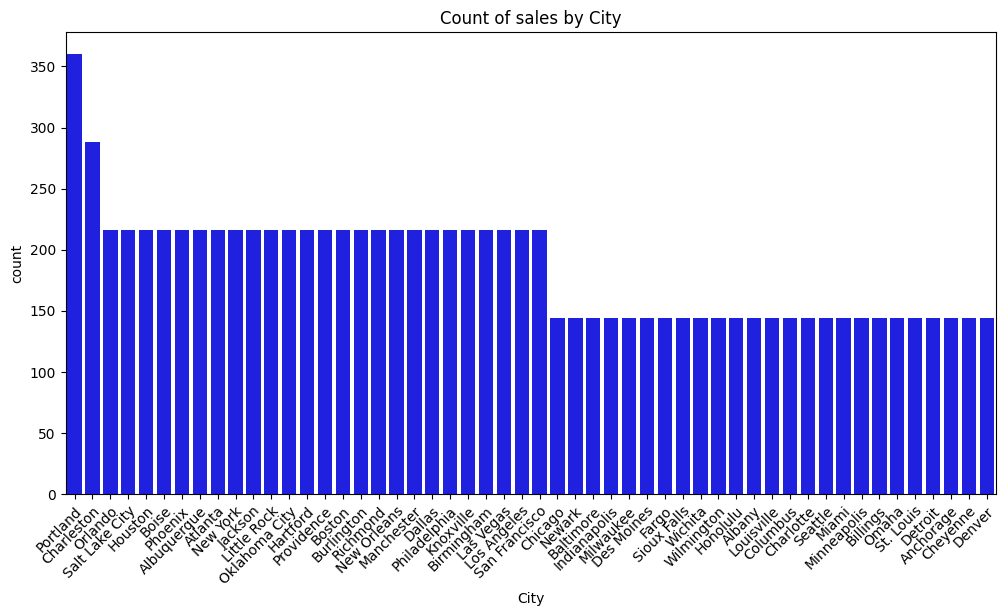

In [11]:
# Show count of sales of 'City' (seaborn)
plot = sns.countplot(x='City', data=df, color='blue', order=df['City'].value_counts().index)
plt.title('Count of sales by City')
plt.setp(plot.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
# Change figure size
fig = plot.get_figure()
fig.set_size_inches(12, 6)
# Show plot
plt.show()

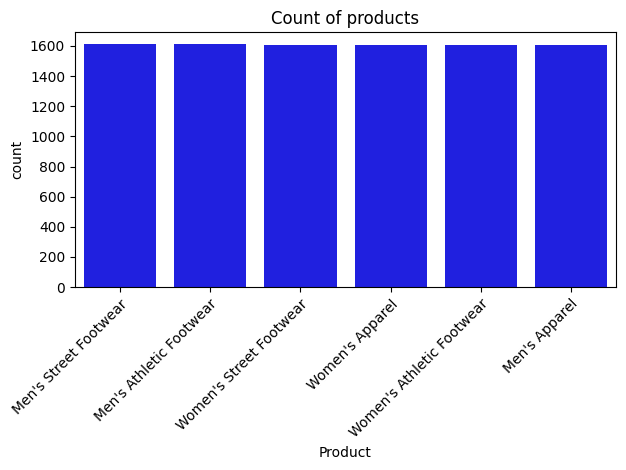

In [12]:
# Show the count of products (seaborn)
plot = sns.countplot(x='Product', data=df, color='blue', order=df['Product'].value_counts().index)
plt.title('Count of products')
plt.setp(plot.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
# Change figure size
fig = plot.get_figure()
# fig.set_size_inches(12, 6)
# Change layout
plt.tight_layout()
# Show plot
plt.show()

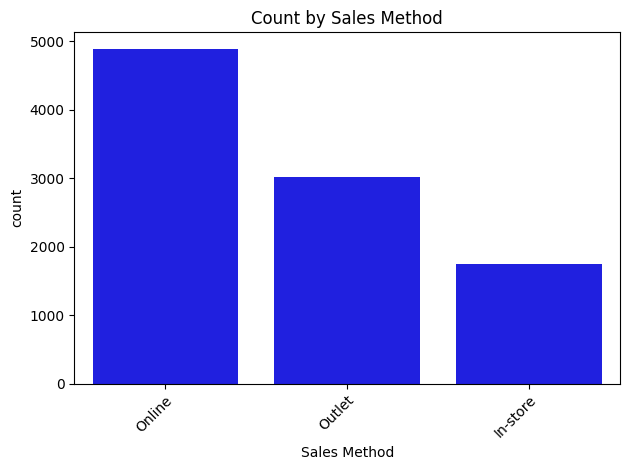

In [13]:
# Show the count of 'Sales Method' (seaborn)
plot = sns.countplot(x='Sales Method', data=df, color='blue', order=df['Sales Method'].value_counts().index)
plt.title('Count by Sales Method')
plt.setp(plot.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
# Change figure size
fig = plot.get_figure()
# fig.set_size_inches(12, 6)
# Change layout
plt.tight_layout()
# Show plot
plt.show()

<Axes: xlabel='Price per Unit', ylabel='Units Sold'>

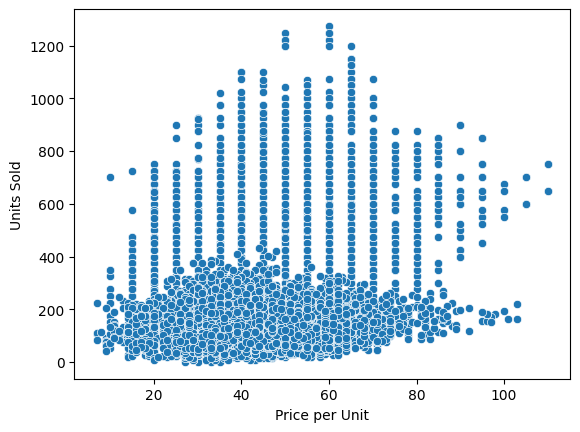

In [14]:
# Plot scatter plot of 'Price per Unit' and 'Units Sold' (seaborn)
sns.scatterplot(x='Price per Unit', y='Units Sold', data=df)

C:\Users\bruno\AppData\Local\Temp\ipykernel_1856\3004680758.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_date = df.groupby(df['Invoice Date'].dt.to_period('M')).sum()


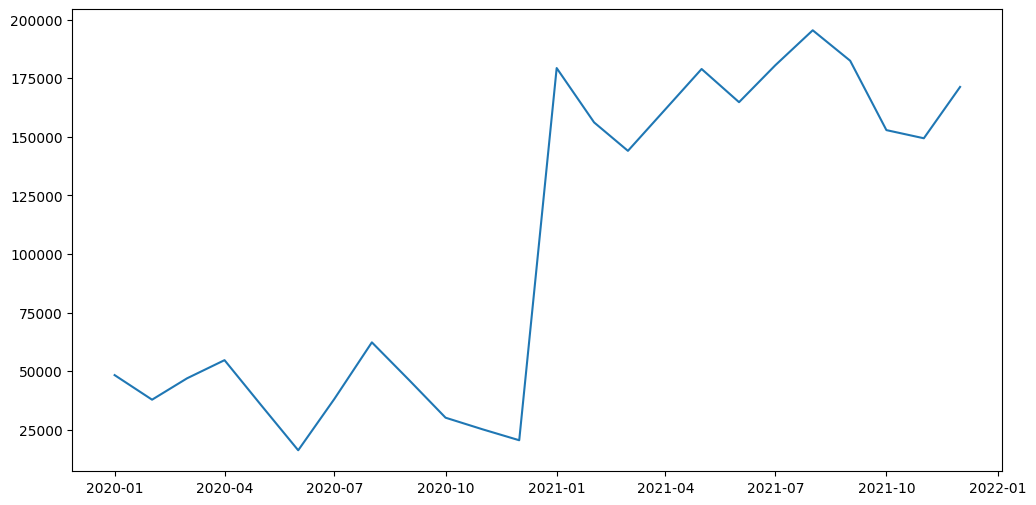

In [15]:
# Plot the number of sales along the time (seaborn)
# Group by date (per month)
df_date = df.groupby(df['Invoice Date'].dt.to_period('M')).sum()

# Reset date day
df_date.index = df_date.index.to_timestamp()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df_date.index, df_date['Units Sold'])

**Observação:** Apenas foram feitas algumas análises iniciais para alguns testes, porém as a análise exploratória de fato foi feita no tableau e será disponibilizada no relatório.